In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class biased_k_faced_die:
    def __init__(self, k):
        self.k = k
        self._generate_probs()

    def _get_prob_for_face(self, face):
        return self.p[face]
    
    def _generate_probs(self):
        self.p = [0] * self.k
        for i in range(self.k):
            if i == 0 or i == self.k-1:
                self.p[i] = 1 / (2 ** (self.k - 1))
            else:
                self.p[i] = 1 / (2 ** ((i+1) - 1))
        self.p = np.array(self.p)
    
    def roll(self):
        return np.random.choice(self.k, p=self.p) + 1


## a)

In [22]:
def experiment_k_4_rolls_4():
    die = biased_k_faced_die(4)
    rolls = [die.roll() for _ in range(4)]
    return sum(rolls)

def simulate(num_runs, experiment):
    results = [experiment() for _ in range(num_runs)]
    return results

In [23]:
sum_values_1000_runs_k_4_rolls_4 = simulate(1000, experiment_k_4_rolls_4)

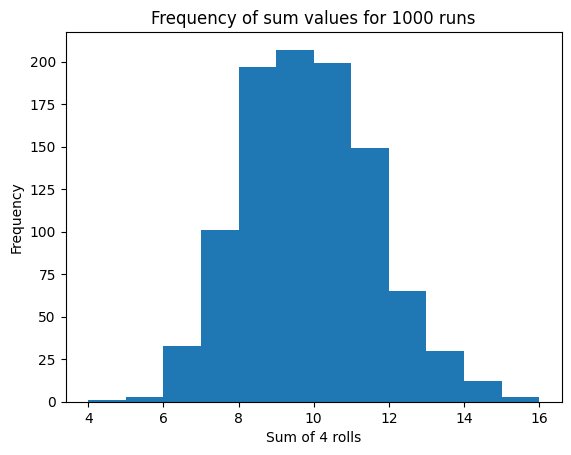

In [24]:
# Plot frequency of sum values
max_sum_possible = 4 * 4
min_sum_possible = 4
plt.hist(sum_values_1000_runs_k_4_rolls_4, bins=range(min_sum_possible, max_sum_possible+1))
plt.xlabel('Sum of 4 rolls')
plt.ylabel('Frequency')
plt.title('Frequency of sum values for 1000 runs')
plt.show()

In [25]:
def get_median(data):
    data = np.sort(data)
    n = len(data)
    if n % 2 == 0:
        return (data[n//2] + data[n//2 - 1]) / 2
    else:
        return data[n//2]
    
def get_quantiles(data, num_quantiles):
    data = np.sort(data)
    n = len(data)
    quantiles = []
    for i in range(num_quantiles):
        quantiles.append(data[int(i * n / num_quantiles)])
    return quantiles

def bowleys_coefficient(data):
    quantiles = get_quantiles(data, 3)
    q1, q3 = quantiles[0], quantiles[2]
    median = get_median(data)
    iqr = q3 - q1
    return (q3 + q1 - 2 * median) / iqr

In [26]:
print("Bowley's coefficient for 1000 runs with 4 faces and 4 rolls: ", bowleys_coefficient(sum_values_1000_runs_k_4_rolls_4))

Bowley's coefficient for 1000 runs with 4 faces and 4 rolls:  -0.6666666666666666


## b)

In [27]:
def experiment_k_4_rolls_8():
    die = biased_k_faced_die(4)
    rolls = [die.roll() for _ in range(8)]
    return sum(rolls)

sum_values_1000_runs_k_4_rolls_8 = simulate(1000, experiment_k_4_rolls_8)

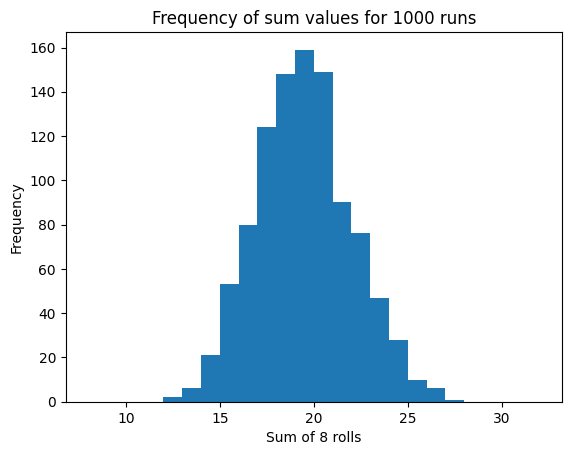

In [28]:
max_sum_possible = 4 * 8
min_sum_possible = 8
plt.hist(sum_values_1000_runs_k_4_rolls_8, bins=range(min_sum_possible, max_sum_possible+1))
plt.xlabel('Sum of 8 rolls')
plt.ylabel('Frequency')
plt.title('Frequency of sum values for 1000 runs')
plt.show()

In [29]:
print("Bowley's coefficient for 1000 runs with 4 faces and 8 rolls: ", bowleys_coefficient(sum_values_1000_runs_k_4_rolls_8))

Bowley's coefficient for 1000 runs with 4 faces and 8 rolls:  -0.75


## c)

In [30]:
def experiment_k_16_rolls_4():
    die = biased_k_faced_die(16)
    rolls = [die.roll() for _ in range(4)]
    return sum(rolls)

sum_values_1000_runs_k_16_rolls_4 = simulate(1000, experiment_k_16_rolls_4)

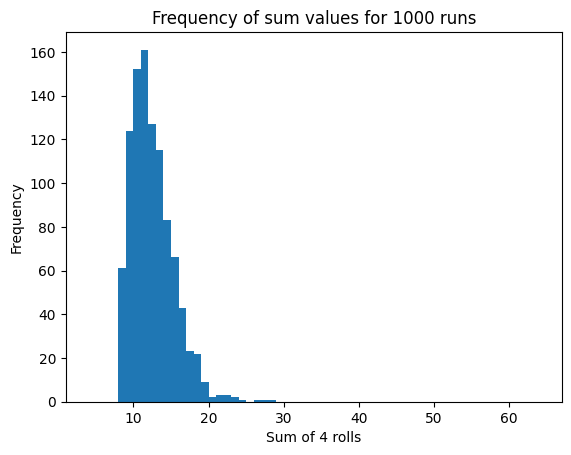

In [31]:
max_sum_possible = 16 * 4
min_sum_possible = 4
plt.hist(sum_values_1000_runs_k_16_rolls_4, bins=range(min_sum_possible, max_sum_possible+1))
plt.xlabel('Sum of 4 rolls')
plt.ylabel('Frequency')
plt.title('Frequency of sum values for 1000 runs')
plt.show()

In [32]:
print("Bowley's coefficient for 1000 runs with 16 faces and 4 rolls: ", bowleys_coefficient(sum_values_1000_runs_k_16_rolls_4))

Bowley's coefficient for 1000 runs with 16 faces and 4 rolls:  -0.6
